<a href="https://colab.research.google.com/github/dandiputra2/TugasAkhir_DataMining/blob/main/CekDataSet_Naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler


from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import roc_curve ,roc_auc_score, auc

import os
for dirname, _, filenames in os.walk('Gaji_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('Gaji_Dataset.csv')
X = df.iloc[:, [1, 2]].values
y = df.iloc[:, -1].values

In [3]:
df.head(15)

,ID,Lama_Bekerja,Umur,Kelamin,Gaji
0,1,5,28,Perempuan,200000
1,2,1,21,Laki-Laki,50000
2,3,3,23,Perempuan,150000
3,4,2,22,Laki-Laki,60000
4,5,1,18,Laki-Laki,10000
5,6,25,60,Laki-Laki,5100000
6,7,19,55,Perempuan,750000
7,8,2,22,Perempuan,11000
8,9,10,36,Perempuan,61500
9,10,15,54,Perempuan,650000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            40 non-null     int64 
 1   Lama_Bekerja  40 non-null     int64 
 2   Umur          40 non-null     int64 
 3   Kelamin       40 non-null     object
 4   Gaji          40 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB


In [5]:
df.isnull().sum()

ID              0
Lama_Bekerja    0
Umur            0
Kelamin         0
Gaji            0
dtype: int64

In [6]:
len(df[df.duplicated()])

0

In [7]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df[df.duplicated()])

0

Text(0.5, 1.0, 'Checking imbalance')

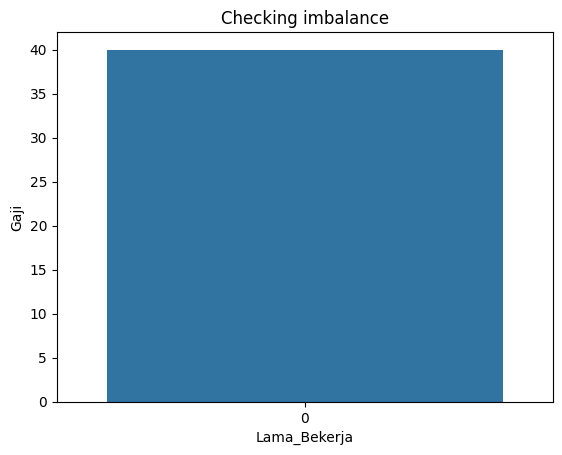

In [9]:
sns.countplot(df["Umur"])
plt.xlabel("Lama_Bekerja")
plt.ylabel("Gaji")
plt.title("Checking imbalance")

<ipython-input-10-4580e8b7f774>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(df.skew(),hist=False)
<ipython-input-10-4580e8b7f774>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.skew(),hist=False)


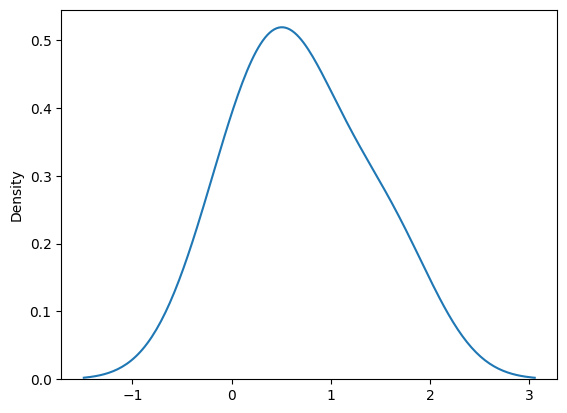

In [10]:
sns.distplot(df.skew(),hist=False)
plt.show()

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                   19.50
Lama_Bekerja         12.25
Umur                 27.75
Gaji            1410000.00
dtype: float64


<ipython-input-11-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-11-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


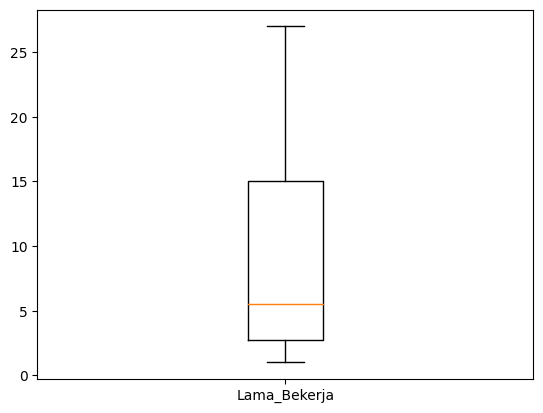

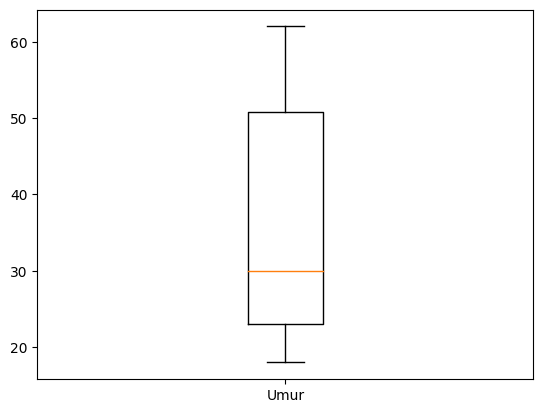

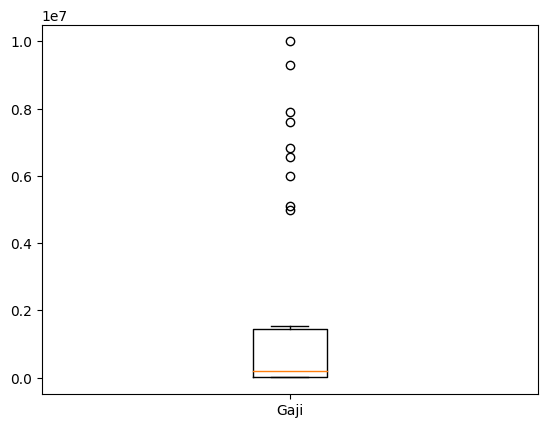

In [12]:
plt.boxplot([df["Lama_Bekerja"]])
plt.xticks([1],["Lama_Bekerja"])
plt.show()
plt.boxplot([df["Umur"]])
plt.xticks([1],["Umur"])
plt.show()
plt.boxplot([df["Gaji"]])
plt.xticks([1],["Gaji"])
plt.show()

In [13]:
print(df['Umur'].quantile(0.10))
print(df['Umur'].quantile(0.90))

21.0
54.1


In [14]:
df["Umur"] = np.where(df["Umur"] <21.0, 21.0,df['Umur'])
df["Umur"] = np.where(df["Umur"] >54.0, 54.0,df['Umur'])

df.head()

,ID,Lama_Bekerja,Umur,Kelamin,Gaji
0,1,5,28.0,Perempuan,200000
1,2,1,21.0,Laki-Laki,50000
2,3,3,23.0,Perempuan,150000
3,4,2,22.0,Laki-Laki,60000
4,5,1,21.0,Laki-Laki,10000


In [15]:
cols=['Lama_Bekerja', 'Gaji']
for label in cols:
    df[label]=LabelEncoder().fit_transform(df[label])
df.head()

,ID,Lama_Bekerja,Umur,Kelamin,Gaji
0,1,4,28.0,Perempuan,17
1,2,0,21.0,Laki-Laki,11
2,3,2,23.0,Perempuan,16
3,4,1,22.0,Laki-Laki,12
4,5,0,21.0,Laki-Laki,5


In [16]:
df.corr()["Umur"]

<ipython-input-16-07ed6793421c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Umur"]


ID              0.250237
Lama_Bekerja    0.958426
Umur            1.000000
Gaji            0.817139
Name: Umur, dtype: float64

<ipython-input-17-f1a090c0658b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)


<Axes: >

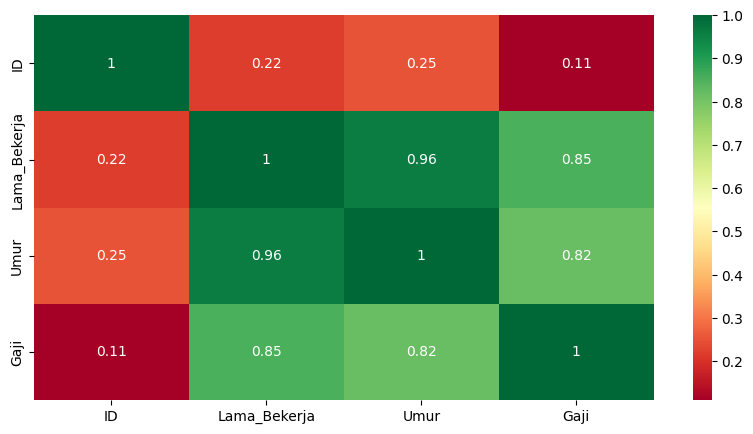

In [17]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)

<Axes: xlabel='Gaji'>

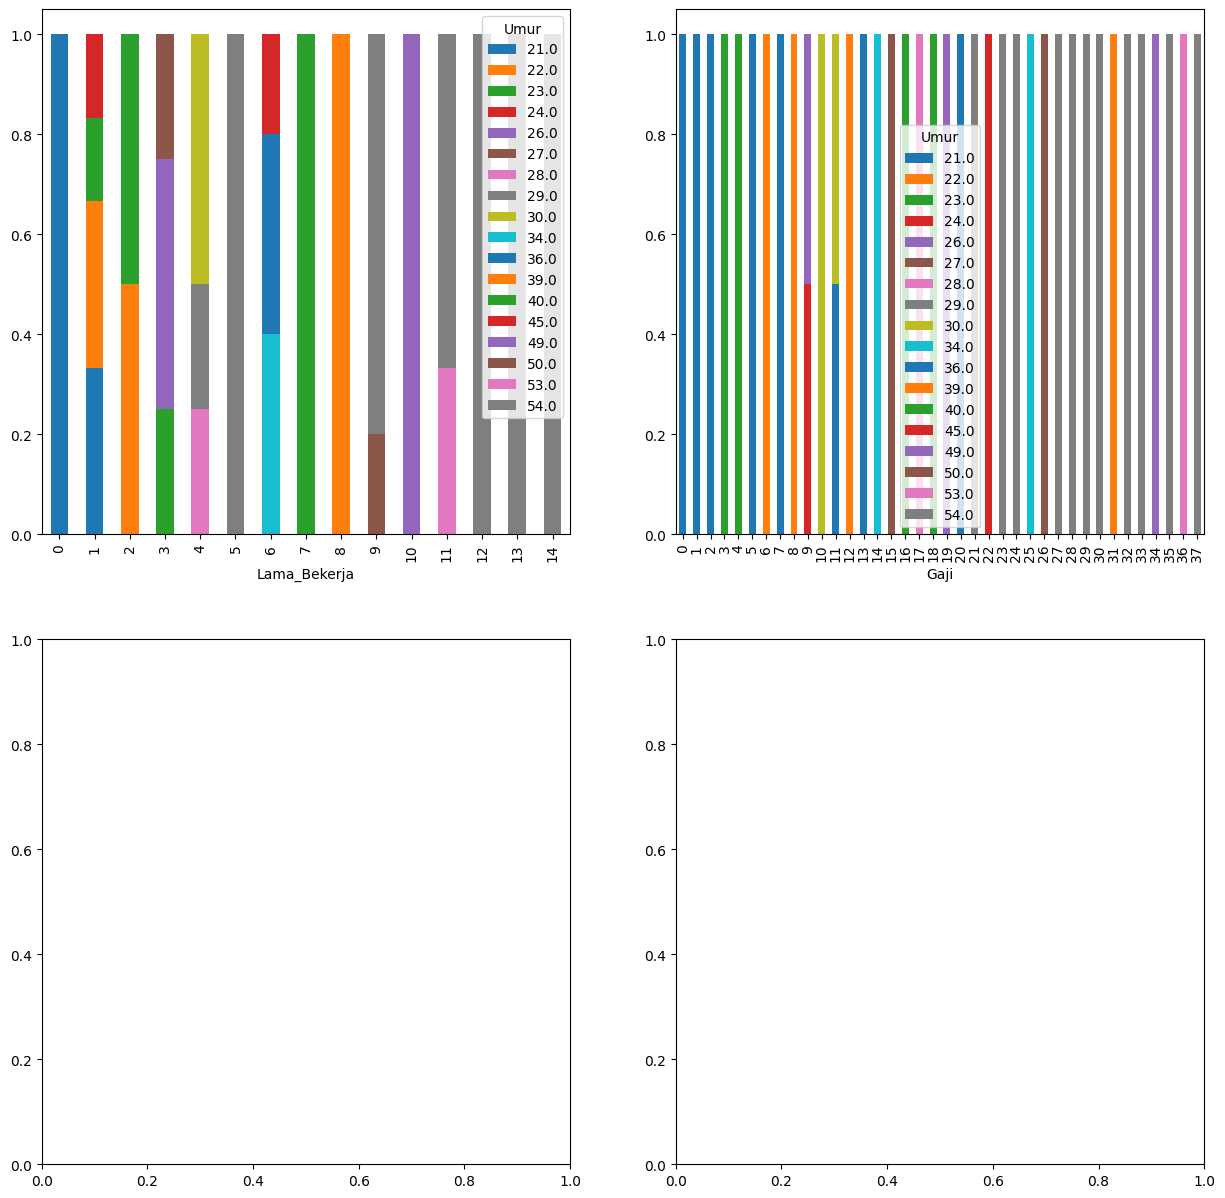

In [18]:
# satisfactoryLevel vs left
fig, ax = plt.subplots(2,2,figsize = (15,15))
Lama_Bekerja = pd.crosstab(df['Lama_Bekerja'],df['Umur'])
Lama_Bekerja.div(Lama_Bekerja.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

#Gaji vs Umur
Gaji= pd.crosstab(df['Gaji'],df['Umur'])
Gaji.div(Gaji.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,1])